In [1]:
# Imports of necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('AirbnbIstanbul.csv')

In [3]:
# Display the first 5 rows of the DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,2018-11-07,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,NaN,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,NaN,NaN,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,2018-05-04,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,NaN,NaN,13,356


In [4]:
# Get information about the columns in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16251 entries, 0 to 16250
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16251 non-null  int64  
 1   name                            16160 non-null  object 
 2   host_id                         16251 non-null  int64  
 3   host_name                       16244 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   16251 non-null  object 
 6   latitude                        16251 non-null  float64
 7   longitude                       16251 non-null  float64
 8   room_type                       16251 non-null  object 
 9   price                           16251 non-null  int64  
 10  minimum_nights                  16251 non-null  int64  
 11  number_of_reviews               16251 non-null  int64  
 12  last_review                     

In [5]:
# Checking how many null values each attribute has

df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               16251
last_review                        8484
reviews_per_month                  8484
name                                 91
host_name                             7
id                                    0
host_id                               0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Dropping unusable columns

del df["neighbourhood_group"];
del df["last_review"];

In [7]:
# Dropping rows that have null in name and host_name attributes

df.dropna(subset=["name", "host_name"], inplace=True)

In [8]:
# Filling reviews with that are NaN with 0

df["reviews_per_month"].fillna(0, inplace=True)

In [9]:
# Checking how many duplicated rows we have (rows that have every attribute of the same value)

df.duplicated().sum()

0

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,0.00,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,0.00,13,356


In [11]:
# Rechecking the data after cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16155 entries, 0 to 16250
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16155 non-null  int64  
 1   name                            16155 non-null  object 
 2   host_id                         16155 non-null  int64  
 3   host_name                       16155 non-null  object 
 4   neighbourhood                   16155 non-null  object 
 5   latitude                        16155 non-null  float64
 6   longitude                       16155 non-null  float64
 7   room_type                       16155 non-null  object 
 8   price                           16155 non-null  int64  
 9   minimum_nights                  16155 non-null  int64  
 10  number_of_reviews               16155 non-null  int64  
 11  reviews_per_month               16155 non-null  float64
 12  calculated_host_listings_count  

In [12]:
# Checking how many records of each room type we have

df["room_type"].value_counts()

Private room       8501
Entire home/apt    7164
Shared room         490
Name: room_type, dtype: int64

In [13]:
# Analytical information about the price

df['price'].describe()

count    16155.000000
mean       355.289941
std       1433.062707
min          0.000000
25%        105.000000
50%        185.000000
75%        327.000000
max      59561.000000
Name: price, dtype: float64

In [14]:
# Removing records that have price 0 because that is impossible and thus making our analytical information incorrect

df.drop(df.price[df.price<=0].index,axis=0,inplace=True)
df['price'].describe()

count    16152.000000
mean       355.355931
std       1433.187613
min         16.000000
25%        105.000000
50%        187.500000
75%        327.000000
max      59561.000000
Name: price, dtype: float64

<AxesSubplot: title={'center': 'Accommodations with most listings'}>

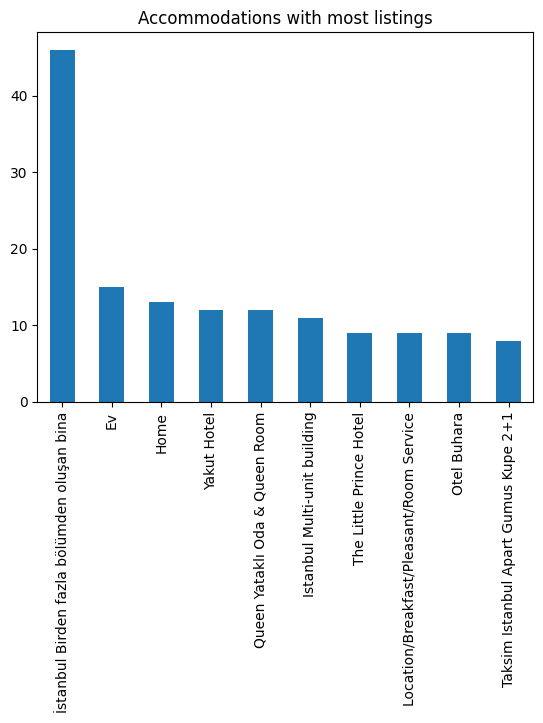

In [15]:
# Accommodations with most listings

chart1 = df["name"].value_counts()
chart1.head(10).plot(kind="bar", title="Accommodations with most listings")

<AxesSubplot: title={'center': 'Neighbourhoods with most accommodations'}>

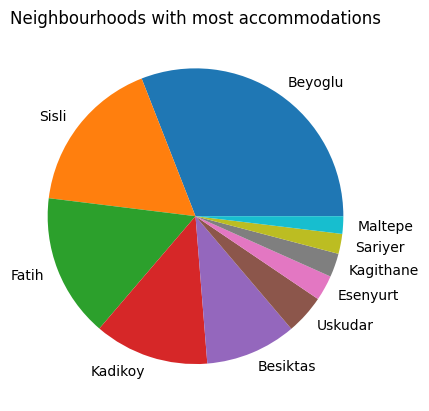

In [16]:
chart2 = df.groupby(['neighbourhood']).size().sort_values(ascending=False)
chart2.head(10).plot(kind="pie", title="Neighbourhoods with most accommodations")

<AxesSubplot: title={'center': 'Mean Price of Neighbourhoods'}, xlabel='neighbourhood'>

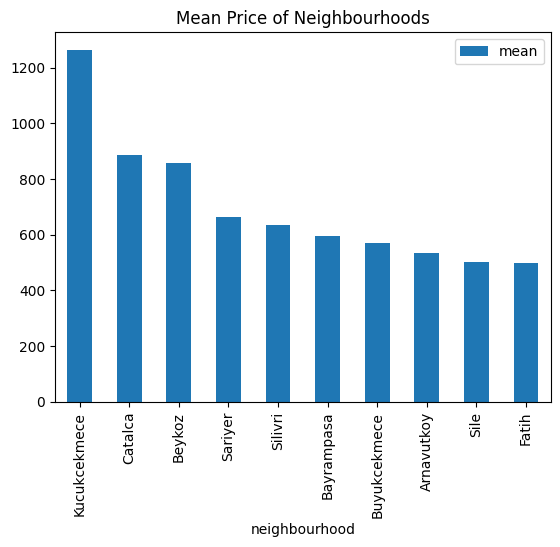

In [17]:
chart3 = df.groupby("neighbourhood")["price"].agg(['mean']).sort_values(by="mean", ascending=False)
chart3.head(10).plot(kind="bar", title="Mean Price of Neighbourhoods")

In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,0.00,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,0.00,13,356


In [19]:
# Visualising the number of reviews in each neighbourhood group through pie chart

areas_review = df.groupby('neighbourhood')['number_of_reviews'].max()
plt.rcParams['figure.figsize'] = (12,8)
reviews = areas_review['number_of_reviews']
plt.pie(reviews, labels = areas_review['neighbourhood'], autopct ='%0.2f%%', startangle =60,explode = [0.1,0.1,0.1,0.1,0.1], shadow = True)
plt.title('Number of monthly reviews in each neighbourhood group', {'fontsize': 20})
plt.show()

KeyError: 'number_of_reviews'